In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df_data = pd.read_csv('data/cleaned/BroadleafCommerce-broadleaf-3.0.10-GA-Unified.csv')
df_data

,Unnamed: 0,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
0,1,0.000000,0,0,0,0.0,0.000000,0,0,1,...,6,0,5,0,6,75,0,5,0,0
1,2,0.000000,0,0,0,0.0,0.000000,0,0,1,...,1,0,1,0,1,1,0,1,0,0
2,3,0.000000,0,0,0,0.0,0.000000,0,0,1,...,1,0,1,0,1,1,0,1,0,0
3,4,0.000000,0,0,0,0.0,0.000000,0,0,2,...,3,0,2,0,15,19,1,14,0,0
4,5,0.000000,0,0,0,0.0,0.000000,0,0,2,...,3,0,2,0,15,20,1,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,2089,0.000000,0,0,0,0.0,0.000000,0,0,1,...,18,0,6,0,18,128,0,6,0,0
1589,2090,0.000000,0,0,0,0.0,0.000000,0,0,0,...,1,0,1,0,1,1,0,1,0,0
1590,2091,0.000000,0,0,0,0.0,0.000000,0,0,1,...,3,0,3,0,3,6,0,3,0,0
1591,2092,0.691456,5,6,5,0.5,0.598485,89,79,3,...,10,0,10,0,12,93,0,11,0,0


In [3]:
df_data = df_data.iloc[:, 1:]

In [4]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1593 non-null   float64
 1   CCL     1593 non-null   int64  
 2   CCO     1593 non-null   int64  
 3   CI      1593 non-null   int64  
 4   CLC     1593 non-null   float64
 5   CLLC    1593 non-null   float64
 6   LDC     1593 non-null   int64  
 7   LLDC    1593 non-null   int64  
 8   LCOM5   1593 non-null   int64  
 9   NL      1593 non-null   int64  
 10  NLE     1593 non-null   int64  
 11  WMC     1593 non-null   int64  
 12  CBO     1593 non-null   int64  
 13  CBOI    1593 non-null   int64  
 14  NII     1593 non-null   int64  
 15  NOI     1593 non-null   int64  
 16  RFC     1593 non-null   int64  
 17  AD      1593 non-null   float64
 18  CD      1593 non-null   float64
 19  CLOC    1593 non-null   int64  
 20  DLOC    1593 non-null   int64  
 21  PDA     1593 non-null   int64  
 22  

In [5]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,...,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,0.112190,0.946014,6.417451,1.227244,0.089394,0.100460,10.870056,9.785311,1.084746,1.368487,...,6.956058,0.988073,6.297552,1.600126,9.627746,29.822348,1.106717,8.435028,2.231011,0.183302
std,0.234867,2.819458,28.565839,4.124457,0.199196,0.215462,32.479682,28.527125,1.307006,2.239815,...,10.671868,4.282045,10.161972,4.136967,14.146982,54.381566,4.324310,12.854216,4.967165,0.387035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,4.000000,0.000000,4.000000,0.000000,6.000000,12.000000,0.000000,5.000000,1.000000,0.000000
75%,0.080628,1.000000,2.000000,1.000000,0.064516,0.075676,10.000000,9.000000,1.000000,2.000000,...,8.000000,0.000000,7.000000,2.000000,12.000000,29.000000,0.000000,10.000000,2.000000,0.000000
max,1.000000,29.000000,635.000000,60.000000,1.000000,1.000000,404.000000,318.000000,20.000000,37.000000,...,170.000000,97.000000,170.000000,85.000000,170.000000,489.000000,97.000000,170.000000,85.000000,1.000000


In [6]:
df_data.shape

(1593, 61)

In [7]:
X = df_data.iloc[:, 0:-1]
y = df_data["bug"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (1593, 60)
y: (1593,)


In [8]:
X.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLG,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,...,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,0.112190,0.946014,6.417451,1.227244,0.089394,0.100460,10.870056,9.785311,1.084746,1.368487,...,2.148148,6.956058,0.988073,6.297552,1.600126,9.627746,29.822348,1.106717,8.435028,2.231011
std,0.234867,2.819458,28.565839,4.124457,0.199196,0.215462,32.479682,28.527125,1.307006,2.239815,...,4.533865,10.671868,4.282045,10.161972,4.136967,14.146982,54.381566,4.324310,12.854216,4.967165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,4.000000,0.000000,4.000000,0.000000,6.000000,12.000000,0.000000,5.000000,1.000000
75%,0.080628,1.000000,2.000000,1.000000,0.064516,0.075676,10.000000,9.000000,1.000000,2.000000,...,3.000000,8.000000,0.000000,7.000000,2.000000,12.000000,29.000000,0.000000,10.000000,2.000000
max,1.000000,29.000000,635.000000,60.000000,1.000000,1.000000,404.000000,318.000000,20.000000,37.000000,...,80.000000,170.000000,97.000000,170.000000,85.000000,170.000000,489.000000,97.000000,170.000000,85.000000


In [20]:
#bug distribution

Classes: [0, 1]
Counts: [1301, 292]


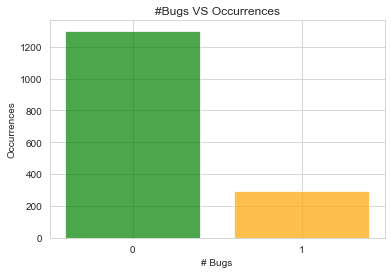

In [9]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [10]:
# save the dataset for c5
filename = 'BroadleafCommerce.csv'
df_data.to_csv('data/cleaned/baseline/{}'.format(filename),sep=',')

In [11]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5)
print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
      "Cross Validation", X_cv.shape, y_cv.shape)


Train: (1115, 60) (1115,) Test: (239, 60) (239,) Cross Validation (239, 60) (239,)


In [12]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [13]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [14]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [15]:
scores = {}

In [17]:
# classifiers baseline

In [79]:
#adaboost

In [16]:
# AdaBoostClassifier
ada_params = {
  #  'clf__learning_rate': [0.1, 0.5, 1.0],
  #  'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train, y_train, X_cv, y_cv, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 91.63179916317992 %
recall: 76.67569397427218 %
ROC: 76.67569397427218 %


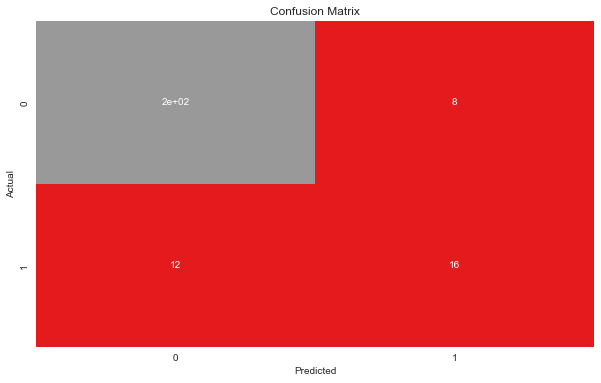

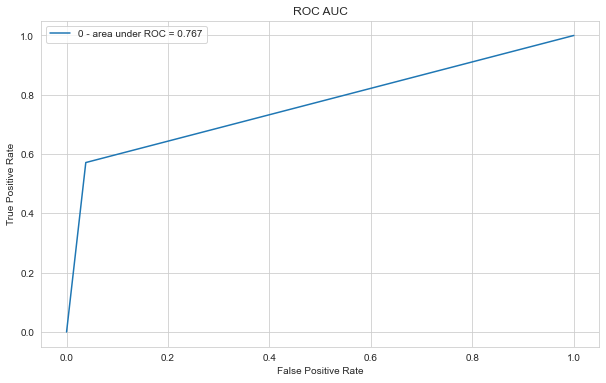

In [34]:
model_scoring = model_eval(ada["model"], X_test, y_test)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                            "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

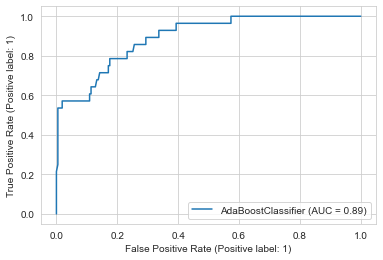

In [41]:
ROC_curve = plot_roc_curve(ada["model"], X_test, y_test)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
#xgboost

In [19]:
xg_params = {
  #  'clf__max_depth': [8, 9],
  #  'clf__learning_rate': [0.1],
  #  'clf__n_estimators':[200],
  #  'clf__reg_alpha':[1.1],
  #  'clf__colsample_bytree':[0.8],
  #  'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train, y_train, X_cv, y_cv, xg_params, scale=False, n_jobs=5)

[08:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {}


accuracy: 91.21338912133892 %
recall: 79.5362220717671 %
ROC: 79.5362220717671 %


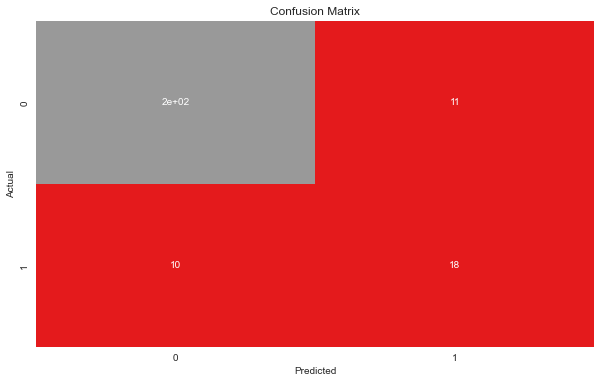

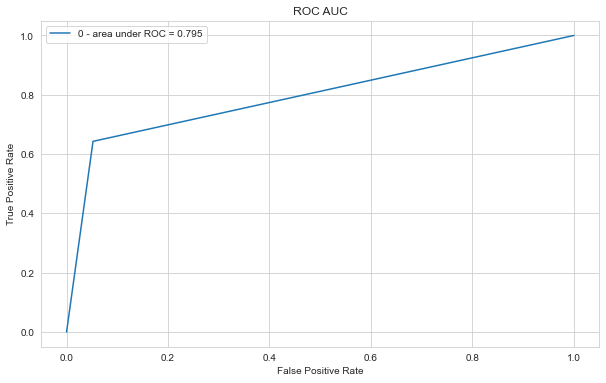

In [20]:
model_scoring = model_eval(xgboost["model"], X_test, y_test)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

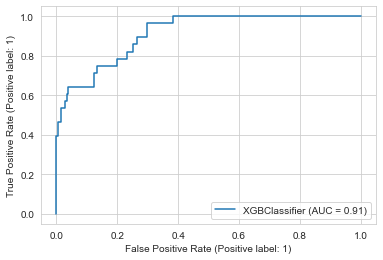

In [42]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test, y_test)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# Random Forest

In [23]:
rfc_params = {
   # 'clf__n_estimators'      : [200, 500],
   # 'clf__max_depth'         : [10, 20],
   # 'clf__max_features': [1.0, 0.7, 0.4],
   # 'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train, y_train, X_cv, y_cv, rfc_params, scale=False) 

Best Parameters for model: {}


accuracy: 91.21338912133892 %
recall: 76.43872714962762 %
ROC: 76.43872714962761 %


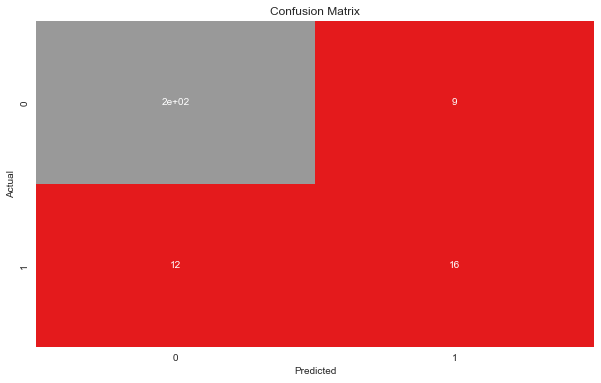

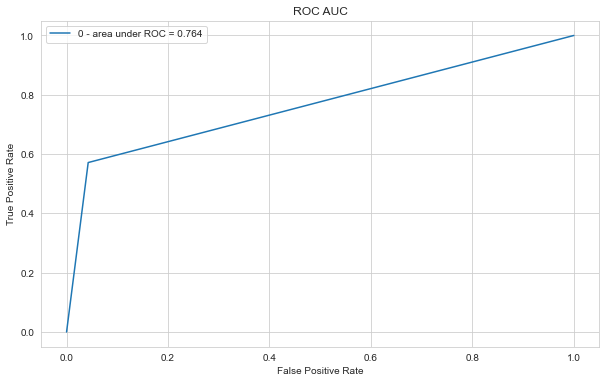

In [35]:
model_scoring = model_eval(rfc["model"], X_test, y_test)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                           "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

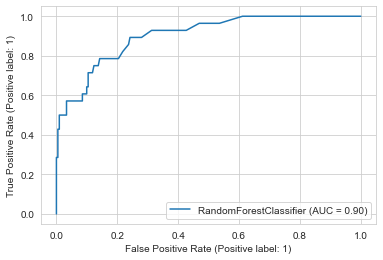

In [43]:
ROC_curve = plot_roc_curve(rfc["model"], X_test, y_test)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [84]:
#svm

In [26]:
# SVC()
svc_params = {
   # 'clf__C': [0.1, 1, 10],
   # 'clf__kernel': ['linear', 'rbf'],
   # 'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train, y_train, X_cv, y_cv, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 91.21338912133892 %
recall: 68.69498984427894 %
ROC: 68.69498984427894 %


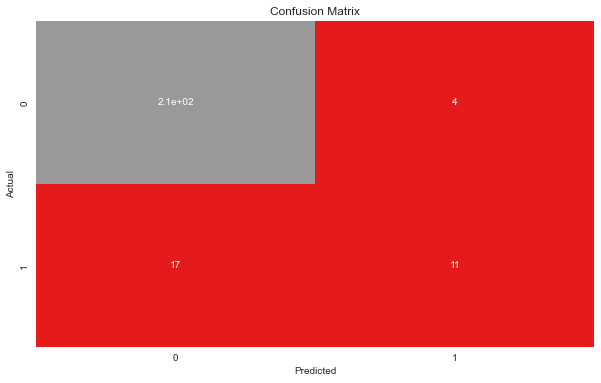

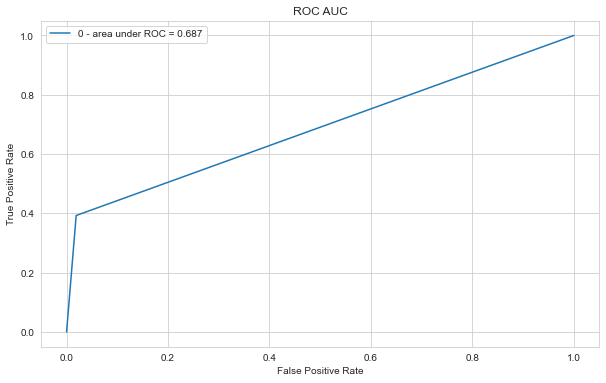

In [36]:
model_scoring = model_eval(svc["model"], X_test, y_test)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

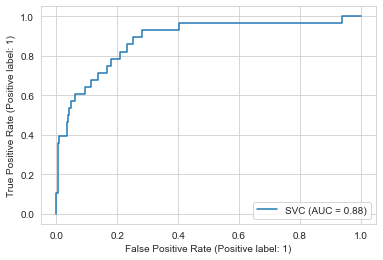

In [44]:
ROC_curve = plot_roc_curve(svc["model"], X_test, y_test)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [29]:
naive_bayes = Modeler(GaussianNB, X_train, y_train, X_cv, y_cv,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 80.75313807531381 %
recall: 68.96580907244415 %
ROC: 68.96580907244415 %


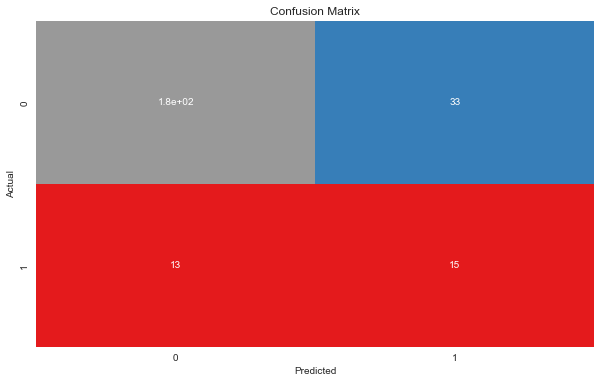

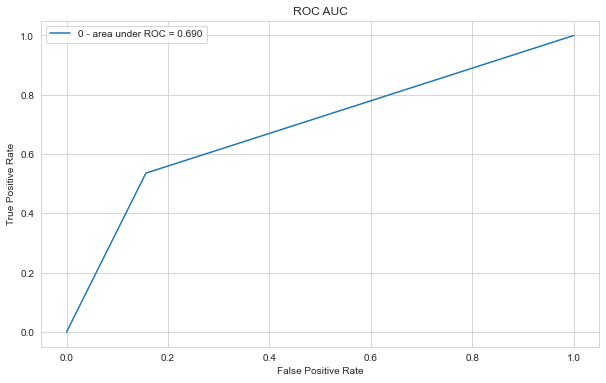

In [38]:
model_scoring = model_eval(naive_bayes["model"], X_test, y_test)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             #"ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                            "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

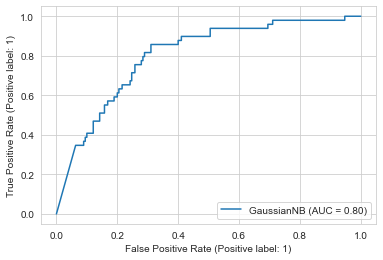

In [45]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv, y_cv)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [46]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('Accuracy', ascending=False)

In [47]:
score_df

,Accuracy,F1-Score,Recall-Score,AUC
AdaBoost Classifier | Binary,91.63,78.42,76.68,89.35
XGBoost | Binary,91.21,79.08,79.54,91.27
Random Forest | Binary,91.21,77.72,76.44,90.17
Support-Vector Machine | Binary,91.21,73.17,68.69,88.20
Naive Bayes | Binary,80.75,64.02,68.97,80.28
